In [2]:
if 'google.colab' in str(get_ipython()):
  # install packages required for this tutorial
  !pip install tensorflow==2.3.1
  !pip install tensorflow_quantum==0.4.0
  !pip install quple==0.7.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast

*** Quantum Circuit***

 Learned how to:

- Create a quantum circuit with customizable qubit layout
- Apply gate operations on specific set of qubits for a given circuit
- Parameterise a gate operation and resolve the parameters with custom input values
- Circuit simulation: statevector simulation and expectation simulation

In [3]:
import cirq
import numpy as np
import sympy as sp
import quple

**Create Quantum Circuits**

In quple, a base class for building quantum circuit is quple.QuantumCircuit which is derived from the cirq.Circuits class. So any methods applicable to cirq.Circuits can also be applied to quple.QuantumCircuit.
The QuantumCircuit class accepts the following arguments:
n_qubit: If int, it specifies the number of qubits in the circuit.
If iterable of cirq.GridQubit object, it specifies the exact qubit layout of the circuit.
name: Name of the circuit
insert_strategy: The insertion strategy of gate operations in the circuit. Default is cirq.circuits.InsertStrategy.INLINE
backend: The backend for circuit simulation. If None, defaults to the native TensorFlow simulator

In [4]:
from quple import QuantumCircuit

In [5]:
cq = QuantumCircuit(n_qubit=5, name='line_qubit_layout')
print('Qubit layout for the circuit "{}":'.format(cq.name))
# by default, a line qubit layout is used
cq.qubits

Qubit layout for the circuit "line_qubit_layout":


[cirq.GridQubit(0, 0),
 cirq.GridQubit(0, 1),
 cirq.GridQubit(0, 2),
 cirq.GridQubit(0, 3),
 cirq.GridQubit(0, 4)]

In [6]:
# now let's try a square grid qubit layout
qubits = cirq.GridQubit.rect(3, 3)
cq_2 = QuantumCircuit(n_qubit=qubits, name='square_qubit_layout')
print('Qubit layout for the circuit "{}":'.format(cq_2.name))
# by default, a line qubit layout is used
cq_2.qubits

Qubit layout for the circuit "square_qubit_layout":


[cirq.GridQubit(0, 0),
 cirq.GridQubit(0, 1),
 cirq.GridQubit(0, 2),
 cirq.GridQubit(1, 0),
 cirq.GridQubit(1, 1),
 cirq.GridQubit(1, 2),
 cirq.GridQubit(2, 0),
 cirq.GridQubit(2, 1),
 cirq.GridQubit(2, 2)]

**Apply gate operations**

QuantumCircuit allows for easy application of gate operations with the following features:
Most gate operations are appened to the QuantumCircuit class methods. The gate operation can also be accessed by specifying its corresponding string representation.
Evey qubit in the circuit is represented by an index. So the target qubit(s) of a gate operation can be specified purely by the qubits' numeric indices.

## **Construction of the quantum circuit for a Bell state**

In [7]:
# Creates a circuit with 2 qubits
cq = QuantumCircuit(2, name='BellCircuit')
# Apply the Hadamard gate to the qubit with index 0 
cq.H(0)
# Apply the CNOT gate to qubits with indices 0 and 1
# with the first one being the control qubit
cq.CNOT((0,1))
# Print out the circuit diagram
cq

(0, 0): ───H───@───
               │
(0, 1): ───────X───

## **Construction of a more complicated quantum circuit**

In [8]:
# Creates a circuit with 5 qubits
cq = QuantumCircuit(5)
# Apply the Hadamard gate to all qubits
cq.H(cq.qubits)
# Apply the RZ gates to qubits 2,3 and 4 with a rotation angle of pi/4 
cq.RZ(sp.pi/4, cq.qubits[2:5])
# to make the circuit diagram looks less tangled for 2-qubit gates use the NEW insert strategy instead
cq.set_insert_strategy(cirq.circuits.InsertStrategy.NEW)
# Apply the CNOT gates to the qubit pairs (0, 1), (1, 3), (2, 4)
cq.CNOT([(0, 1), (1, 3), (2,4)])
# Print out the circuit diagram
cq

(0, 0): ───H──────────────@───────────
                          │
(0, 1): ───H──────────────X───@───────
                              │
(0, 2): ───H───Rz(pi/4)───────┼───@───
                              │   │
(0, 3): ───H───Rz(pi/4)───────X───┼───
                                  │
(0, 4): ───H───Rz(pi/4)───────────X───

Another approach to applying gate operation to a quantum circuit is via the appply_gate_operation method

The arguments are:

apply_gate_operation(operation:[str, cirq.Gate], qubit_expr, params=None)

In [9]:
# Creates a circuit with 5 qubits
cq = QuantumCircuit(5)
# Apply the Hadamard gate to all qubits
cq.apply_gate_operation('H', cq.qubits)
# Apply the RZ gates to qubits 2,3 and 4 with a rotation angle of pi/4 
cq.apply_gate_operation('RZ', cq.qubits[2:5], {'rads': sp.pi/4})
# to make the circuit diagram looks less tangled for 2-qubit gates use the NEW insert strategy instead
cq.set_insert_strategy(cirq.circuits.InsertStrategy.NEW)
# Apply the CNOT gate to the qubit pairs (0, 1), (1, 3), (2, 4)
cq.apply_gate_operation('CNOT', [(0, 1), (1, 3), (2,4)])
# Apply the SWAP gate to the qubit pairs (3,4)
cq.apply_gate_operation('SWAP', (3,4))
# Print out the circuit diagram
cq

(0, 0): ───H──────────────@───────────────
                          │
(0, 1): ───H──────────────X───@───────────
                              │
(0, 2): ───H───Rz(pi/4)───────┼───@───────
                              │   │
(0, 3): ───H───Rz(pi/4)───────X───┼───×───
                                  │   │
(0, 4): ───H───Rz(pi/4)───────────X───×───

In [10]:
# to check the list of mapping from string to gate operations:
from quple.circuits.quantum_circuit import kGateMapping
kGateMapping

{'H': cirq.H,
 'I': cirq.I,
 'S': cirq.S,
 'T': cirq.T,
 'X': cirq.X,
 'Y': cirq.Y,
 'Z': cirq.Z,
 'PauliX': cirq.X,
 'PauliY': cirq.Y,
 'PauliZ': cirq.Z,
 'CX': cirq.CNOT,
 'CNOT': cirq.CNOT,
 'CZ': cirq.CZ,
 'XX': cirq.XX,
 'YY': cirq.YY,
 'ZZ': cirq.ZZ,
 'XPowGate': cirq.ops.common_gates.XPowGate,
 'YPowGate': cirq.ops.common_gates.YPowGate,
 'ZPowGate': cirq.ops.common_gates.ZPowGate,
 'XXPowGate': cirq.ops.parity_gates.XXPowGate,
 'YYPowGate': cirq.ops.parity_gates.YYPowGate,
 'ZZPowGate': cirq.ops.parity_gates.ZZPowGate,
 'MS': <function cirq.ion.ion_gates.ms(rads: float) -> cirq.ion.ion_gates.MSGate>,
 'RXX': <function quple.components.gate_ops.RXX(theta: float) -> cirq.ops.parity_gates.XXPowGate>,
 'RYY': <function quple.components.gate_ops.RYY(theta: float) -> cirq.ops.parity_gates.YYPowGate>,
 'RZZ': <function quple.components.gate_ops.RZZ(theta: float) -> cirq.ops.parity_gates.ZZPowGate>,
 'RX': <function cirq.ops.common_gates.rx(rads: Union[float, sympy.core.basic.Basic]) -

# **Appending circuits/ Combining circuits**

In [11]:
# create two circuits with 3 qubits
cq_1 = QuantumCircuit(3)
cq_1.H(cq_1.qubits)
cq_2 = QuantumCircuit(3)
cq_2.X(cq_1.qubits)
print('circuit 1:')
print(cq_1)
print()
print('circuit 2:')
print(cq_2)

circuit 1:
(0, 0): ───H───

(0, 1): ───H───

(0, 2): ───H───

circuit 2:
(0, 0): ───X───

(0, 1): ───X───

(0, 2): ───X───


In [12]:
# create a third circuit that is a combination of the above two circuits
cq_3 = cq_1 + cq_2
cq_3

(0, 0): ───H───X───

(0, 1): ───H───X───

(0, 2): ───H───X───

In [13]:
# alternatively, append the 2nd circuit to the 1st in place
cq_1 += cq_2
cq_1

(0, 0): ───H───X───

(0, 1): ───H───X───

(0, 2): ───H───X───

# **Parameterise a gate operation**

In [14]:
# Creates a circuit with 2 qubits
cq = QuantumCircuit(2)
# Parameterize the angle of an RZ operation on qubit 0 by "theta_0"
theta_0 = sp.Symbol('θ_0')
cq.RZ(theta_0, 0)
# Parameterize the angle of an RZ operation on qubit 1 by "theta_1"
theta_1 = sp.Symbol('θ_1')
cq.RZ(theta_1, 1)
# Parameterize the angle of an RZZ operation on the qubit pair (0, 1) with qubit 1 being the target qubit by "theta_0*theta_1"
cq.PauliRotation('ZZ', theta_0*theta_1, (0, 1))
cq

(0, 0): ───Rz(θ_0)───@─────────────────@───
                     │                 │
(0, 1): ───Rz(θ_1)───X───Rz(θ_0*θ_1)───X───

In [15]:
#check the circuit symbols
cq.symbols

['θ_0', 'θ_1']

**Circuit flattening**

To more efficiently resolve parameter symbols to specified values for a complicated circuits, it is better to flatten the circuit so that each "expression" in a gate operation is regarded as an independent symbol

In [16]:
# flatten the circuit
cq.flatten()
cq

(0, 0): ───Rz(pi*<θ_0/pi>)───@─────────────────────────@───
                             │                         │
(0, 1): ───Rz(pi*<θ_1/pi>)───X───Rz(pi*<θ_0*θ_1/pi>)───X───

In [17]:
# now check the symbols again
cq.symbols

['<θ_0*θ_1/pi>', '<θ_0/pi>', '<θ_1/pi>']

In [18]:
# get get the original symbols after flattening:
cq.raw_symbols

['θ_0', 'θ_1']

In [19]:
# unflatten the circuit
cq.unflatten()
cq

(0, 0): ───Rz(θ_0)───@─────────────────@───
                     │                 │
(0, 1): ───Rz(θ_1)───X───Rz(θ_0*θ_1)───X───

**Resolve parameters of a circuit**

To obtain circuit with its paramterised gate operations resolved by some designated values, one can use the resolve_parameters method

In [20]:
# resolve the values:  theta_0 = 0, theta_1 = pi/2
resolved_cq = cq.resolve_parameters(np.array([[0, np.pi/2]]))
resolved_cq

(0, 0): ───Rz(0)──────@───────────@───
                      │           │
(0, 1): ───Rz(0.5π)───X───Rz(0)───X───

In [21]:
# this also work for flattened circuit the usual way
cq.flatten()
resolved_cq = cq.resolve_parameters(np.array([[0, np.pi/2]]))
resolved_cq

(0, 0): ───Rz(0)──────@───────────@───
                      │           │
(0, 1): ───Rz(0.5π)───X───Rz(0)───X───

In [22]:
cq.unflatten()

In [23]:
# resolve multiple set of values:  
# [(theta_0 = 0, theta_1 = pi/2), (theta_0 = pi/3, theta_1 = pi/4)]
resolved_cqs = cq.resolve_parameters(np.array([[0, np.pi/2], [np.pi/3, np.pi/4]]))
print('------------------------------------------------')
print('resolved circuit 0:')
print(resolved_cqs[0])
print('------------------------------------------------')
print('resolved circuit 1:')
print(resolved_cqs[1])
print('------------------------------------------------')

------------------------------------------------
resolved circuit 0:
(0, 0): ───Rz(0)──────@───────────@───
                      │           │
(0, 1): ───Rz(0.5π)───X───Rz(0)───X───
------------------------------------------------
resolved circuit 1:
(0, 0): ───Rz(0.333π)───@────────────────@───
                        │                │
(0, 1): ───Rz(0.25π)────X───Rz(0.262π)───X───
------------------------------------------------


In [24]:
n_circuit = 5
# let's try some random values from -pi to pi
random_values = np.random.uniform(-np.pi, np.pi, (n_circuit, len(cq.symbols)))
resolved_cqs = cq.resolve_parameters(random_values)
for c in resolved_cqs:
    print('------------------------------------------------')
    print(c)
print('------------------------------------------------')

------------------------------------------------
(0, 0): ───Rz(0.447π)───@────────────────@───
                        │                │
(0, 1): ───Rz(0.175π)───X───Rz(0.245π)───X───
------------------------------------------------
(0, 0): ───Rz(0.141π)───@────────────────@───
                        │                │
(0, 1): ───Rz(0.076π)───X───Rz(0.034π)───X───
------------------------------------------------
(0, 0): ───Rz(-0.378π)───@────────────────@───
                         │                │
(0, 1): ───Rz(-0.621π)───X───Rz(0.737π)───X───
------------------------------------------------
(0, 0): ───Rz(-0.088π)───@─────────────────@───
                         │                 │
(0, 1): ───Rz(0.495π)────X───Rz(-0.137π)───X───
------------------------------------------------
(0, 0): ───Rz(0.729π)───@────────────────@───
                        │                │
(0, 1): ───Rz(0.272π)───X───Rz(0.623π)───X───
------------------------------------------------


# **Circuit simulation**
The QuantumCircuit class has two build-in methods for easy statevector and expectation simulation which uses the tensorflow_quantum layers.

Alternative, one can simply treat a QuantumCircuit instance as a cirq.Circuit instance and perform simulation using cirq or tensorflow quantum build-in utilities

**statevector simulation**

To perform statevector simulation, simply use the get_state_vectors method from QuantumCircuit

The arguments are:

vals: The values feeded to the parameter resolver. Default is None for the case of a non-parameterised circuit. If dict, it represents the map from sympy.Symbol objects to symbol values. If list of dict, it represents a list of parameter resolvers each with a map from sympy.Symbol objects to symbol values. If numpy array, it represents a mapping of symbol values according to the symbol indices.

In [25]:
# let's check the statevector for a Bell circuit
cq = QuantumCircuit(2, name='BellCircuit')
cq.H(0)
cq.CNOT((0,1))
cq

(0, 0): ───H───@───
               │
(0, 1): ───────X───

In [26]:
cq.get_state_vectors()

array([[7.0710677e-01-1.2802769e-08j, 0.0000000e+00+0.0000000e+00j,
        2.7021173e-15-3.0908620e-08j, 7.0710677e-01+6.1817239e-08j]],
      dtype=complex64)

In [27]:
# let's check the statevector for a simple parameterised circuit
cq = QuantumCircuit(2)
cq.H([0, 1])
cq.RZ(sp.Symbol('x'), [0, 1])
cq.CNOT((0,1))
cq

(0, 0): ───H───Rz(x)───@───
                       │
(0, 1): ───H───Rz(x)───X───

In [28]:
# resolve the values of the symbol x from 0 to 2pi with intervals of 200
symbol_values = np.linspace(0, 2*np.pi, 200)
symbol_values = symbol_values.reshape((200, 1))
state_vectors = cq.get_state_vectors(symbol_values)
state_vectors[0]

array([0.49999997-1.81058493e-08j, 0.49999997+1.28027695e-08j,
       0.49999997+4.37113883e-08j, 0.49999997+1.28027704e-08j],
      dtype=complex64)

# **expectation simulation**
To perform expectation simulation, simply use the get_expectation method from QuantumCircuit

The arguments are:

vals: The values feeded to the parameter resolver. Default is None for the case of a non-parameterised circuit. If dict, it represents the map from sympy.Symbol objects to symbol values. If list of dict, it represents a list of parameter resolvers each with a map from sympy.Symbol objects to symbol values. If numpy array, it represents a mapping of symbol values according to the symbol indices.
operators: cirq operators for measuring the expecation value. If None, defaults to the PauliZ operator in the first qubit.
repetitions: Number of measurement for computing the expecation. Default is 5000.

In [29]:
# let's check the expectation for the first qubit for a Bell circuit
cq = QuantumCircuit(2, name='BellCircuit')
cq.H(0)
cq.CNOT((0,1))
cq

(0, 0): ───H───@───
               │
(0, 1): ───────X───

In [30]:
result = cq.get_expectation(operators=[cirq.Z(qubits[0]), cirq.Z(qubits[1])], repetitions=5000)
print(result)

[[-0.0044 -0.0044]]


We can see that both qubits have expectation 0 for the PauliZ operator. This means for both qubits, they have equal probability of being in the spin up (i.e. measured Z value is 1) or spin down (i.e. measured Z value is -1) states

In [31]:
# let's check the expectation for a simple parameterised circuit
cq = QuantumCircuit(1)
cq.RX(sp.Symbol('x'), 0)
cq

(0, 0): ───Rx(x)───

In [32]:
symbol_values = np.linspace(0, 2*np.pi, 200)
symbol_values = symbol_values.reshape((200, 1))
result = cq.get_expectation(symbol_values)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

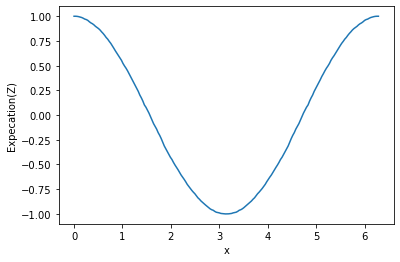

In [33]:
import matplotlib.pyplot as plt
x = np.linspace(0, 2*np.pi, 200)
y = result.reshape((200))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Expecation(Z)')
plt